In [2]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
aqi=pd.read_csv("aqi.csv")

In [4]:
aqi.head()

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
0,30-04-2025,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
1,30-04-2025,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
2,30-04-2025,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
3,30-04-2025,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN
4,30-04-2025,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN


In [5]:
aqi1=aqi.dropna(axis=1)
aqi1

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit
0,30-04-2025,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...
1,30-04-2025,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...
2,30-04-2025,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...
3,30-04-2025,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...
4,30-04-2025,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...
...,...,...,...,...,...,...,...,...
235780,01-04-2022,Bihar,Arrah,1,PM10,210,Poor,number_of_monitoring_stations in Absolute Numb...
235781,01-04-2022,Rajasthan,Jaipur,3,"PM2.5,PM10",158,Moderate,number_of_monitoring_stations in Absolute Numb...
235782,01-04-2022,Maharashtra,Chandrapur,2,PM2.5,201,Poor,number_of_monitoring_stations in Absolute Numb...
235783,01-04-2022,Uttar Pradesh,Varanasi,4,PM10,128,Moderate,number_of_monitoring_stations in Absolute Numb...


In [6]:
aqi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235785 entries, 0 to 235784
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   date                           235785 non-null  object
 1   state                          235785 non-null  object
 2   area                           235785 non-null  object
 3   number_of_monitoring_stations  235785 non-null  int64 
 4   prominent_pollutants           235785 non-null  object
 5   aqi_value                      235785 non-null  int64 
 6   air_quality_status             235785 non-null  object
 7   unit                           235785 non-null  object
dtypes: int64(2), object(6)
memory usage: 14.4+ MB


In [7]:
# Step 1: Clean any invisible whitespace (just to be safe)
aqi1['date'] = aqi1['date'].astype(str).str.strip()

# Step 2: Convert using the exact format
aqi1['date'] = pd.to_datetime(aqi1['date'], format='%d-%m-%Y', errors='coerce')

# Step 4: Verify a few dates
print(aqi1['date'].head())


0   2025-04-30
1   2025-04-30
2   2025-04-30
3   2025-04-30
4   2025-04-30
Name: date, dtype: datetime64[ns]


C:\Users\91935\AppData\Local\Temp\ipykernel_1100\3385762070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi1['date'] = aqi1['date'].astype(str).str.strip()
C:\Users\91935\AppData\Local\Temp\ipykernel_1100\3385762070.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi1['date'] = pd.to_datetime(aqi1['date'], format='%d-%m-%Y', errors='coerce')


In [8]:
start_date = '2022-01-01'

aqi_filtered = aqi1[(aqi1['date'] >= start_date)]
print(aqi_filtered.shape)

(235785, 8)


In [11]:
southern_states = ['Tamil Nadu', 'Kerala', 'Karnataka', 'Andhra Pradesh', 'Telangana']
south_data = aqi_filtered[aqi_filtered["state"].isin(southern_states)]
print(south_data.shape)  


(49224, 8)


In [26]:
pollutant_rows = (
    south_data
    .assign(pollutant=south_data['prominent_pollutants'].str.split(','))
    .explode('pollutant')  # one pollutant per row
    .dropna(subset=['pollutant'])
)

In [27]:
print(pollutant_rows.shape)

(54045, 9)


In [28]:
pollutant_rows

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,pollutant
6,2025-04-30,Kerala,Kollam,1,PM10,73,Satisfactory,number_of_monitoring_stations in Absolute Numb...,PM10
10,2025-04-30,Karnataka,Hubballi,1,PM10,46,Good,number_of_monitoring_stations in Absolute Numb...,PM10
13,2025-04-30,Tamil Nadu,Vellore,1,PM10,51,Satisfactory,number_of_monitoring_stations in Absolute Numb...,PM10
15,2025-04-30,Tamil Nadu,Chengalpattu,1,PM10,66,Satisfactory,number_of_monitoring_stations in Absolute Numb...,PM10
16,2025-04-30,Andhra Pradesh,Tirupati,1,PM2.5,47,Good,number_of_monitoring_stations in Absolute Numb...,PM2.5
...,...,...,...,...,...,...,...,...,...
235770,2022-04-01,Kerala,Kannur,1,PM10,76,Satisfactory,number_of_monitoring_stations in Absolute Numb...,PM10
235773,2022-04-01,Karnataka,Kalaburagi,1,PM10,129,Moderate,number_of_monitoring_stations in Absolute Numb...,PM10
235774,2022-04-01,Karnataka,Koppal,1,PM10,52,Satisfactory,number_of_monitoring_stations in Absolute Numb...,PM10
235778,2022-04-01,Telangana,Hyderabad,5,"PM2.5,PM10",137,Moderate,number_of_monitoring_stations in Absolute Numb...,PM2.5


In [29]:
pollutant_rows.loc[0:66,["state","area","prominent_pollutants","pollutant"]]

,state,area,prominent_pollutants,pollutant
6,Kerala,Kollam,PM10,PM10
10,Karnataka,Hubballi,PM10,PM10
13,Tamil Nadu,Vellore,PM10,PM10
15,Tamil Nadu,Chengalpattu,PM10,PM10
16,Andhra Pradesh,Tirupati,PM2.5,PM2.5
17,Tamil Nadu,Dindigul,PM10,PM10
18,Andhra Pradesh,Kadapa,O3,O3
22,Tamil Nadu,Ranipet,PM10,PM10
27,Karnataka,Yadgir,PM2.5,PM2.5
34,Tamil Nadu,Chennai,"PM10,O3,CO",PM10


In [30]:
# Count frequency of each pollutant per state
pollutant_counts = (
    pollutant_rows
    .groupby(['state', 'pollutant'])
    .size()
    .reset_index(name='count')
)


In [31]:
pollutant_counts 

,state,pollutant,count
0,Andhra Pradesh,CO,565
1,Andhra Pradesh,NO2,259
2,Andhra Pradesh,O3,1013
3,Andhra Pradesh,PM10,3606
4,Andhra Pradesh,PM2.5,2244
5,Andhra Pradesh,SO2,11
6,Karnataka,CO,3456
7,Karnataka,NH3,34
8,Karnataka,NO2,430
9,Karnataka,O3,2562


In [32]:
# Get top 2 and bottom 2 pollutants per state
top_bottom_pollutants = []

for state in southern_states:
    state_pollutants = pollutant_counts[pollutant_counts['state'] == state]
    top_2 = state_pollutants.sort_values(by='count', ascending=False).head(2)
    bottom_2 = state_pollutants.sort_values(by='count', ascending=True).head(2)
    result = pd.concat([top_2.assign(rank='Top'), bottom_2.assign(rank='Bottom')])
    top_bottom_pollutants.append(result)

# Combine all states
final_pollutant_df = pd.concat(top_bottom_pollutants)


In [33]:
print("Top 2 & Bottom 2 Pollutants Per Southern State:")
print(final_pollutant_df[['state', 'pollutant', 'count', 'rank']])


Top 2 & Bottom 2 Pollutants Per Southern State:
             state pollutant  count    rank
25      Tamil Nadu      PM10   7187     Top
26      Tamil Nadu     PM2.5   3016     Top
22      Tamil Nadu       NH3     11  Bottom
23      Tamil Nadu       NO2    500  Bottom
18          Kerala      PM10   3538     Top
19          Kerala     PM2.5   1344     Top
20          Kerala       SO2      7  Bottom
15          Kerala       NH3     10  Bottom
10       Karnataka      PM10  14572     Top
6        Karnataka        CO   3456     Top
13       Karnataka       SO3      1  Bottom
7        Karnataka       NH3     34  Bottom
3   Andhra Pradesh      PM10   3606     Top
4   Andhra Pradesh     PM2.5   2244     Top
5   Andhra Pradesh       SO2     11  Bottom
1   Andhra Pradesh       NO2    259  Bottom
31       Telangana      PM10   1002     Top
32       Telangana     PM2.5    590     Top
29       Telangana       NO2    119  Bottom
30       Telangana        O3    152  Bottom


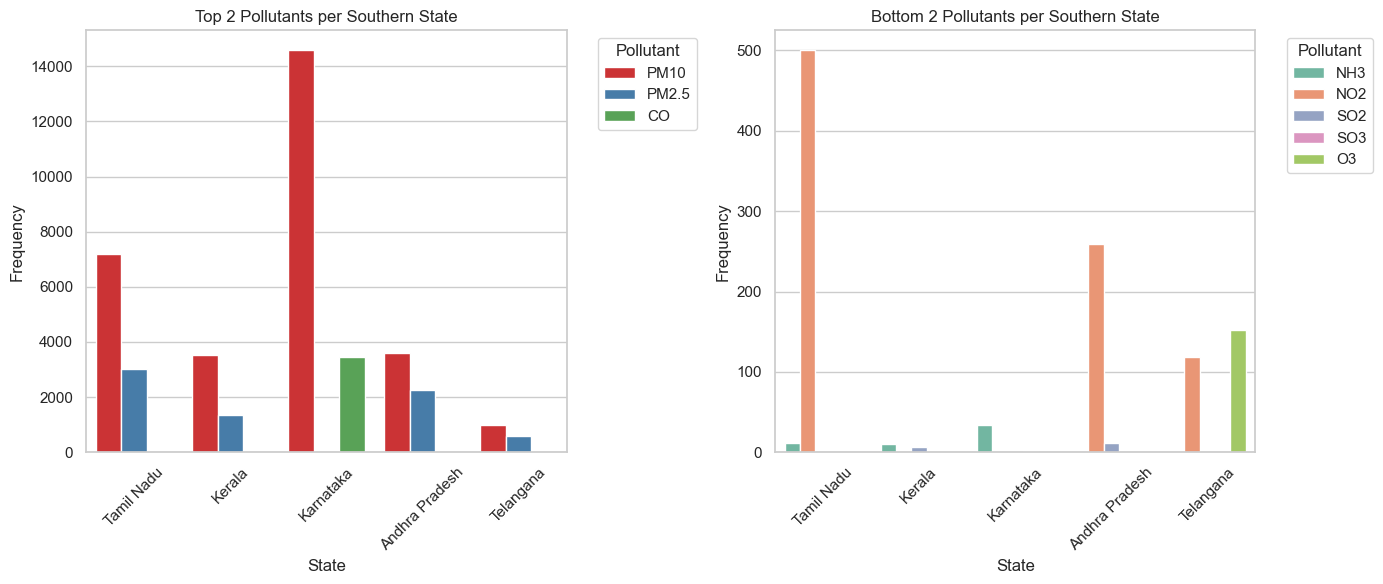

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split into two DataFrames: Top and Bottom
top_df = final_pollutant_df[final_pollutant_df['rank'] == 'Top']
bottom_df = final_pollutant_df[final_pollutant_df['rank'] == 'Bottom']

# Set up the figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.set(style="whitegrid")

# Barplot for Top 2 pollutants
sns.barplot(
    data=top_df,
    x='state',
    y='count',
    hue='pollutant',
    ax=axes[0],
    palette='Set1'
)
axes[0].set_title("Top 2 Pollutants per Southern State")
axes[0].set_ylabel("Frequency")
axes[0].set_xlabel("State")
axes[0].tick_params(axis='x', rotation=45)

# Barplot for Bottom 2 pollutants
sns.barplot(
    data=bottom_df,
    x='state',
    y='count',
    hue='pollutant',
    ax=axes[1],
    palette='Set2'
)
axes[1].set_title("Bottom 2 Pollutants per Southern State")
axes[1].set_ylabel("Frequency")
axes[1].set_xlabel("State")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and legends
axes[0].legend(title="Pollutant", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].legend(title="Pollutant", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
your_dataframe.to_csv('filename.csv', index=False)
your_dataframe.to_csv('filename.csv', index=False)
